In [19]:
import os
import shutil
from collections import defaultdict, Counter

%matplotlib inline
import matplotlib.pyplot as plt

ROOT_DIR = 'compressed_action_frames'

def create_directory(path):
    try:
        os.stat(path)
    except:
        os.mkdir(path)

In [6]:
## Plot the distribution of #clips for each category, as well as the number of clips belonging to each category

class_count = Counter()
clip_distribution = defaultdict(list)
for clip_name in os.listdir(ROOT_DIR):
    loc1 = clip_name.find('>')
    loc2 = clip_name.find('-')
    
    class_name = clip_name[(loc1 + 1): loc2] 
    class_count[class_name] += 1
    clip_distribution[class_name].append(len(os.listdir(os.path.join(ROOT_DIR, clip_name))))

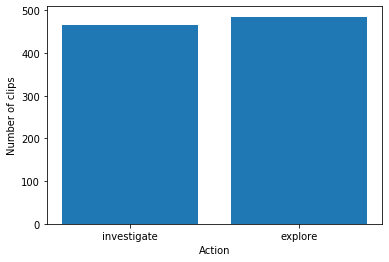

In [11]:
## Plot the number of clips for each class, so that the dataset is balanced

plt.bar(range(len(class_count)), list(class_count.values()), align='center')
plt.xticks(range(len(class_count)), list(class_count.keys()))
plt.xlabel('Action')
plt.ylabel('Number of clips')

plt.show()

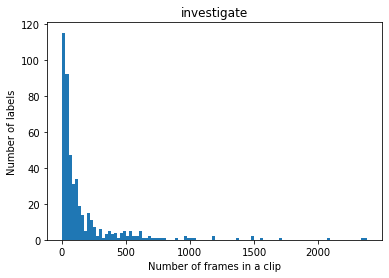

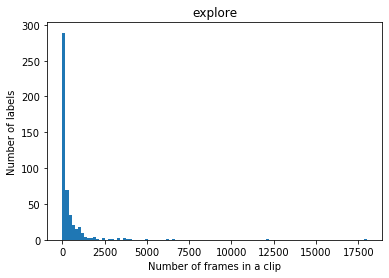

In [18]:
## Plot the distribution of clips for each class, need to trim smaller clips

for class_name, dist in clip_distribution.items():
#     dist.sort()
#     dist = dist[:len(dist)//2]
#     print(dist)
    plt.hist(dist, bins=100)
    plt.title(class_name)
    plt.xlabel('Number of frames in a clip')
    plt.ylabel('Number of labels')
    plt.show()

In [21]:
## Copy all the files which have atleast 60 frames

threshold = 60
THRESH_DIR = '%s-%d'%(ROOT_DIR, threshold)

create_directory(THRESH_DIR)
for clip_name in os.listdir(ROOT_DIR):
    clip_path = os.path.join(ROOT_DIR, clip_name)
    if threshold <= len(os.listdir(clip_path)):
        shutil.copytree(clip_path, os.path.join(THRESH_DIR, clip_name))